# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 3385 Гребенщиков Артём Андреевич. Вариант №3.

## Цель работы

Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения


### Основные определения

#### Социоматрица
Социоматрица $A$ - это квадратная матрица размера $g \times g$, где $g$ - количество акторов в сети. Элемент $a_{ij}$ принимает значение:
- $1$, если существует связь от актора $i$ к актору $j$
- $0$, если связь отсутствует

Для неориентированных сетей матрица симметрична: $a_{ij} = a_{ji}$

#### Список рёбер
Альтернативное представление сети в виде множества упорядоченных пар:
$E = \{(i,j) | a_{ij} = 1\}$

#### Плотность сети
Плотность $den$ неориентированной сети G вычисляется как:

$$den(G) = \frac{2L}{g(g-1)}$$

где $L$ - количество рёбер, $g$ - количество вершин.

#### Компоненты связности
Компонента связности - максимальное подмножество вершин, где существует путь между любой парой вершин.

#### Диаметр сети
Диаметр $diam$ - максимальное геодезическое расстояние между любой парой вершин в сети G:

$$diam(G) = \max_{i,j} d_{ij}$$

где $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Коэффициент кластеризации
Локальный коэффициент кластеризации $Cl_i$ для вершины $i$ графа G:

$$Cl_i(G) = \frac{2N_i}{k_i(k_i-1)}$$

где $N_i$ - количество треугольников через вершину $i$, $k_i$ - степень вершины.

Глобальный коэффициент кластеризации:

$$Cl(G) = \frac{1}{n} \sum_{i=1}^n C_i$$







### Меры центральности

#### Центральность по степени
Для вершины $i$ в неориентированной сети:

$$C_D(i) = deg(i)$$

Нормированная центральность по степени:

$$C_D'(i) = \frac{deg(i)}{g - 1}$$

#### Центральность по близости
$$C_C(i) = \frac{1}{\sum_{j \neq i} d_{ij}}$$

где $d_{ij}$ - расстояние между вершинами.

Нормированная центральность по близости:

$$C_C'(i) = \frac{g-1}{\sum_{j \neq i} d_{ij}}$$

#### Центральность по посредничеству
$$C_B(i) = \sum_{j < k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$$

где $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$, $\sigma_{jk}(i)$ - количество таких путей через $i$.

Нормированная центральность по посредничеству:

$$C_B'(i) =\frac{2 C_B(i)}{(g-1)(g-2)}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = ∑c_{ij}$
Тогда центральность по информации:

$$C_I(i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(i) = \frac{C_I(i)}{∑C_I(j)}$$


### Меры престижа для ориентированных сетей

#### Престиж по степени
$$P_D(i) = \frac{deg_i(i)}{g-1}$$

где $deg_i(i)$ - полустепень захода.

#### Престиж по близости
$$
P_P(i) = \frac{|I_i|}{g-1} \cdot \frac{|I_i|}{\sum d_{ij}}
$$
где $|I_i|$ — количество вершин, достижимых из $i$,  

#### Престиж по рангу
Решается система уравнений:
$$
\left(\frac{1}{a}E - X\right)^TP_R = x
$$
где:  
- $X$ — социоматрица
- $a = \frac{1}{\lambda}$, где $\lambda$ — максимальное собственное значение матрицы $X$  
- $x$ — вектор сумм столбцов  
- $E$ — единичная матрица  

Нормированный престиж:
$$
P_R^{'}(n_i) = \frac{P_R(n_i)}{m}$$

где $ m = \sum^{g-1}_{k=1} a^kA^k_{g-1}$


### Алгоритмы визуализации сетей

#### Фрюхтерман-Рейнгольд
Основан на физической аналогии:
- Вершины отталкиваются друг от друга
- Рёбра действуют как пружины
Минимизирует функцию энергии:

$$E = \sum_{i \neq j} k_r(d_{ij}) + \sum_{(i,j) \in E} k_a(d_{ij})$$

где $k_r$ - сила отталкивания, $k_a$ - сила притяжения.

#### Камада-Каваи
Минимизирует разницу между геодезическими и евклидовыми расстояниями:

$$E = \sum_{i \neq j} \frac{1}{2} k_{ij}(||p_i - p_j|| - l_{ij})^2$$

где $l_{ij}$ - желаемое расстояние, $k_{ij}$ - вес пружины.

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы


### Загрузка необходимых библиотек

In [ ]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

# Подключаем библиотеку, которая привнесет функцию для перевода графа библиотеки igraph в граф statnet
if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

# Подключаем библиотеку для анализа графа
if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

### Работа с florentine_business.csv

#### 1. Извлечение из florentine_business.csv социоматрицы с выводм на экран



In [ ]:
# Переменная хранит адрес файла florentine_business.csv
url <- "https://drive.google.com/uc?export=download&id=1shboWsyEAABA1P2EM4CtN5Y6FeRiwZi3"

# Считываем данные
data <- read.csv(url,
                 header = FALSE,
                 skip = 1,           # пропускаем комментарий "Business relation between Florentine families"
                 sep = ",",
                 stringsAsFactors = FALSE)

# Создание временной матрицы, чтобы узнать размерность
temp_matrix <- data[-1, ]

# Создание социоматрицы
sociomatrix <- matrix(as.numeric(unlist(temp_matrix)),
                     nrow = nrow(temp_matrix),
                     ncol = ncol(temp_matrix))
print(sociomatrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [3,]    0    0    0    0    1    1    0    0    1     0     1     0     0
 [4,]    0    0    0    0    0    0    1    1    0     0     1     0     0
 [5,]    0    0    1    0    0    0    0    1    0     0     1     0     0
 [6,]    0    0    1    0    0    0    0    0    1     0     0     0     0
 [7,]    0    0    0    1    0    0    0    1    0     0     0     0     0
 [8,]    0    0    0    1    1    0    1    0    0     0     1     0     0
 [9,]    0    0    1    0    0    1    0    0    0     1     0     0     0
[10,]    0    0    0    0    0    0    0    0    1     0     0     0     0
[11,]    0    0    1    1    1    0    0    1    0     0     0     0     0
[12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
[13,]    0    0    0    0

#### 2. Преобразование социоматрицы в список рёбер и Вывод первых 5 элементов списка рёбер.

In [ ]:
# Создаем пустой вектор для хранения ребер
edges <- character()

# Проходим по всем строкам и столбцам матрицы
for (i in 1:nrow(sociomatrix)) {
  for (j in 1:ncol(sociomatrix)) {
    if (sociomatrix[i,j] == 1) {
      edges <- c(edges, paste0(i, ",", j))
    }
  }
}

cat("Первые 5 рёбер графа:\n")
for (k in 1:min(5, length(edges))) {
  cat(edges[k], "\n")
}


Первые 5 рёбер графа:
3,5 
3,6 
3,9 
3,11 
4,7 


#### 3. Присвоение имен столбцам и строкам социоматрицы

In [ ]:
# Извлекаем названия семей из первой строки данных
family_names <- as.character(data[1, ])

# Устанавливаем названия
rownames(sociomatrix) <- family_names
colnames(sociomatrix) <- family_names
print(sociomatrix)

              Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori
Acciaiuoli             0        0          0         0           0       0
 Albizzi               0        0          0         0           0       0
 Barbadori             0        0          0         0           1       1
 Bischeri              0        0          0         0           0       0
 Castellani            0        0          1         0           0       0
 Ginori                0        0          1         0           0       0
 Guadagni              0        0          0         1           0       0
 Lamberteschi          0        0          0         1           1       0
 Medici                0        0          1         0           0       1
 Pazzi                 0        0          0         0           0       0
 Peruzzi               0        0          1         1           1       0
 Pucci                 0        0          0         0           0       0
 Ridolfi               0 

#### 4. Построение ненаправленной сети с объяснением параметров

In [ ]:
# Построение графа по социоматрице с задачей параметра mode в 'undirected', что делает граф ненаправленным
inet1 <- graph_from_adjacency_matrix(sociomatrix, mode = 'undirected')

#### 5. Отображение сети с помощью алгоритмов укладки

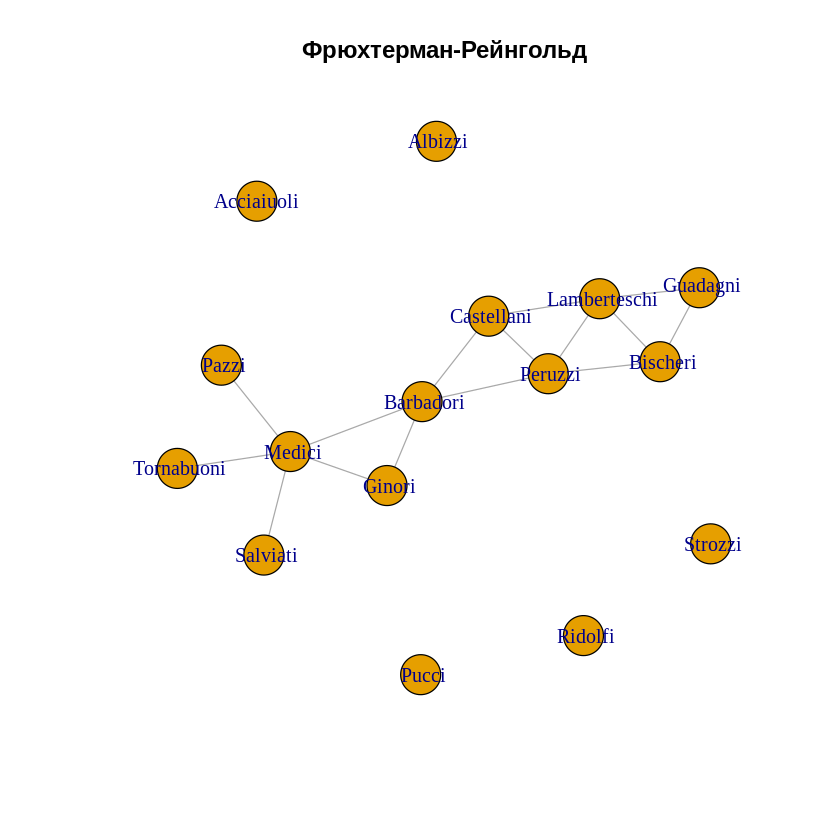

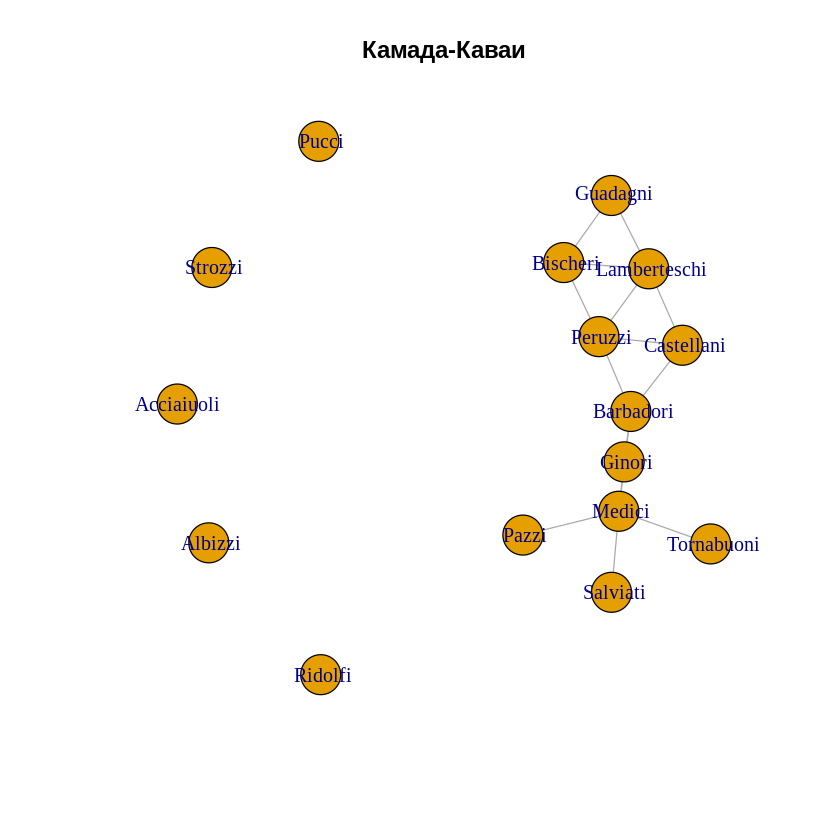

In [ ]:
# Алгоритм Фрюхтермана-Рейнгольда
plot(inet1, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)

# Алгоритм Камада-Каваи
plot(inet1, main = "Камада-Каваи", layout = layout_with_kk)

Алгоритм Фрюхтермана—Рейнгольда стремится к равновесию локальных сил, вычисляя для каждой вершины силу отталкивания и притягивания с последующим перемещением в направлении результирующей силы, в то время как Алгоритм Камада стремится так расположить вершины, чтобы геометрические расстояния между ними на плоскости как можно точнее соответствовали их графическим расстояниям (длине кратчайшего пути в графе). Укладка Фрюхтермана—Рейнгольда более равномерная, в то время как укладка К-Каваи точнее передаёт метрику графа.

#### 6. Вывод «описательной сводки» сети

In [ ]:
# Перевод графа igraph в граф statnet
snet1 <- asNetwork(inet1)

# Выводим описательную сводку
summary(snet1)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.125 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    3    5
 [2,]    3    6
 [3,]    3    9
 [4,]    3   11
 [5,]    4    7
 [6,]    4    8
 [7,]    4   11
 [8,]    5    8
 [9,]    5   11
[10,]    6    9
[11,]    7    8
[12,]    8   11
[13,]    9   10
[14,]    9   14
[15,]    9   16

#### 7. Вычисление «пятичисловой сводки» сети

In [ ]:
# (a) Вычислить размер сети
cat("(a) Размер сети:\n")
cat("Количество вершин:", network.size(snet1), "\n\n")

# (b) Вычислить плотность сети
cat("(b) Плотность сети:\n")
# Вручную: 2L / (n*(n-1)) для неориентированного графа
n <- network.size(snet1)
density_manual <- (2 * network.edgecount(snet1)) / (n * (n - 1))
cat("Плотность вручную:", round(density_manual, 3), "\n")
cat("Плотность функцией:", round(gden(snet1), 3), "\n\n")

# (c) Число компонент сети
cat("(c) Число компонент:\n")
cat("Число компонент визуально:", 6, "\n")
# Подтверждаем функцией
components <- components(snet1)
cat("Число компонент функцией:", components, "\n\n")

# (d) Диаметр сети в statnet
cat("(d) Диаметр сети:\n")
lgc <- component.largest(snet1, result = "graph")
gd <- geodist(lgc)
net_diameter <- max(gd$gdist)
cat("Максимальное расстояние между вершинами:", net_diameter, "\n\n")

# (e) Коэффициент кластеризации
cat("(e) Коэффициент кластеризации:\n")
clustering_coef <- gtrans(snet1, mode = "graph")
cat("Коэффициент кластеризации:", round(clustering_coef, 3), "\n")

(a) Размер сети:
Количество вершин: 16 

(b) Плотность сети:
Плотность вручную: 0.125 
Плотность функцией: 0.125 

(c) Число компонент:
Число компонент визуально: 6 
Число компонент функцией: 6 

(d) Диаметр сети:
Максимальное расстояние между вершинами: 5 

(e) Коэффициент кластеризации:
Коэффициент кластеризации: 0.417 


##### Вывод
Рассматривается граф, иллюстрирующий бизнес связи 16 итальянских семей. По значению плотности графа можнно сделать вывод, что он совсем не плотный. Выявлены 6 компонент связности, что в совокупности с малой плотностью показывает отсутвие командного духа и дружественности у итальянских семей. Диаметр графа 5 - подходит под теории 6 рукопожатий, но не реализует ее из-за количества компонент связности. Достаточно мал для количества семей. Граф имеет умеренную кластеризацию, которую обеспечивает одна компонента связаности.

#### 8. Таблица мер центральности

In [ ]:
# Создаем подграф без изолированных вершин
non_isolated_vertices <- which(degree(snet1) > 0)
snet1_connected <- get.inducedSubgraph(snet1, non_isolated_vertices)

# Вычисляем меры
g <- network.size(snet1_connected)
deg <- degree(snet1_connected) / 2
closeness_cent <- closeness(snet1_connected, gmode = "graph")
between_cent <- betweenness(snet1_connected, gmode = "graph")
info_cent <- infocent(snet1_connected, gmode = "graph")

# Вычисляем нормированные меры
norm_degree <- deg / (g - 1)
norm_closeness <- (g - 1) * closeness_cent
norm_betweenness <- (2 * between_cent) / ((g - 1) * (g - 2))
norm_info_cent <- info_cent / sum(info_cent)

# Создаем таблицу
centrality_table <- data.frame(
  Vertex = network.vertex.names(snet1_connected),
  Norm_Degree = norm_degree,
  Norm_Closeness = norm_closeness,
  Norm_Betweenness = norm_betweenness,
  Norm_Info_Centrality = norm_info_cent
)

# Выводим таблицу
cat("Таблица нормированных мер центральности:\n")
print(centrality_table, row.names = FALSE)

Таблица нормированных мер центральности:
        Vertex Norm_Degree Norm_Closeness Norm_Betweenness Norm_Info_Centrality
     Barbadori         0.4       5.882353       0.55555556           0.12446815
      Bischeri         0.3       4.000000       0.05555556           0.08898359
    Castellani         0.3       5.000000       0.11111111           0.10457651
        Ginori         0.2       4.545455       0.00000000           0.09531249
      Guadagni         0.2       3.125000       0.00000000           0.07656303
  Lamberteschi         0.4       4.166667       0.13333333           0.09837087
        Medici         0.5       5.263158       0.53333333           0.11089878
         Pazzi         0.1       3.571429       0.00000000           0.06388631
       Peruzzi         0.4       5.263158       0.30000000           0.10916767
      Salviati         0.1       3.571429       0.00000000           0.06388631
    Tornabuoni         0.1       3.571429       0.00000000           0.06388631

Семья Медичи доминирует по степени центральности (0.5) и близости (5.26), занимая наиболее выгодную позицию в сети с максимальным количеством прямых связей и минимальной удаленностью от других семей.

Барбадори при меньшем количестве связей (0.4) имеют наивысшую близость (5.88) и абсолютное лидерство по посредничеству (0.56), контролируя ключевые информационные потоки между другими семьями.

Таким образом, Медичи обладают формальным лидерством через прямые связи, в то время как Барбадори выполняют критически важную связующую функцию в сети.

### Работа с krackhardt_advice.csv

#### 1. Извлечение из krackhardt_advice.csv социоматрицы с выводм на экран



In [ ]:
# Переменная хранит адрес файла krackhardt_advice.csv
url <- "https://drive.google.com/uc?export=download&id=1nUJz0xHtd_Lfpw5trk_vFEFQ8YBtW5YP"

# Считываем данные
data <- read.csv(url,
                 header = FALSE,
                 skip = 2,           # пропускаем комментарии "Advice relation between managers # of Krackhardt's high-tech company"
                 sep = ",",
                 stringsAsFactors = FALSE)

print(data)
# Создание временной матрицы, чтобы узнать размерность
temp_matrix <- data[]

# Создание социоматрицы
sociomatrix <- matrix(as.numeric(unlist(temp_matrix)),
                     nrow = nrow(temp_matrix),
                     ncol = ncol(temp_matrix))

#print(sociomatrix)

   V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1   0  1  0  1  0  0  0  1  0   0   0   0   0   0   0   1   0   1   0   0   1
2   0  0  0  0  0  1  1  0  0   0   0   0   0   0   0   0   0   0   0   0   1
3   1  1  0  1  0  1  1  1  1   1   1   1   0   1   0   0   1   1   0   1   1
4   1  1  0  0  0  1  0  1  0   1   1   1   0   0   0   1   1   1   0   1   1
5   1  1  0  0  0  1  1  1  0   1   1   0   1   1   0   1   1   1   1   1   1
6   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   1
7   0  1  0  0  0  1  0  0  0   0   1   1   0   1   0   0   1   1   0   0   1
8   0  1  0  1  0  1  1  0  0   1   1   0   0   0   0   0   0   1   0   0   1
9   1  1  0  0  0  1  1  1  0   1   1   1   0   1   0   1   1   1   0   0   1
10  1  1  1  1  1  0  0  1  0   0   1   0   1   0   1   1   1   1   1   1   0
11  1  1  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   0   0   0   0
12  0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   

#### 2. Преобразование социоматрицы в список рёбер и Вывод первых 5 элементов списка рёбер.

In [ ]:
# Создаем пустой вектор для хранения ребер
edges <- character()

# Проходим по всем строкам и столбцам матрицы
for (i in 1:nrow(sociomatrix)) {
  for (j in 1:ncol(sociomatrix)) {
    if (sociomatrix[i,j] == 1) {
      edges <- c(edges, paste0(i, ",", j))
    }
  }
}

cat("Первые 5 рёбер графа:\n")
for (k in 1:min(5, length(edges))) {
  cat(edges[k], "\n")
}


Первые 5 рёбер графа:
1,2 
1,4 
1,8 
1,16 
1,18 


#### 3. Присвоение имен столбцам и строкам социоматрицы

In [ ]:
# Создаем имена для строк и столбцов на основе размера data
vertex_names <- 1:nrow(data)

# Устанавливаем имена для строк и столбцов
rownames(sociomatrix) <- vertex_names
colnames(sociomatrix) <- vertex_names

print(sociomatrix)

   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21
1  0 1 0 1 0 0 0 1 0  0  0  0  0  0  0  1  0  1  0  0  1
2  0 0 0 0 0 1 1 0 0  0  0  0  0  0  0  0  0  0  0  0  1
3  1 1 0 1 0 1 1 1 1  1  1  1  0  1  0  0  1  1  0  1  1
4  1 1 0 0 0 1 0 1 0  1  1  1  0  0  0  1  1  1  0  1  1
5  1 1 0 0 0 1 1 1 0  1  1  0  1  1  0  1  1  1  1  1  1
6  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  1
7  0 1 0 0 0 1 0 0 0  0  1  1  0  1  0  0  1  1  0  0  1
8  0 1 0 1 0 1 1 0 0  1  1  0  0  0  0  0  0  1  0  0  1
9  1 1 0 0 0 1 1 1 0  1  1  1  0  1  0  1  1  1  0  0  1
10 1 1 1 1 1 0 0 1 0  0  1  0  1  0  1  1  1  1  1  1  0
11 1 1 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0  0
12 0 0 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0  1
13 1 1 0 0 1 0 0 0 1  0  0  0  0  1  0  0  0  1  0  0  0
14 0 1 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  1  0  0  1
15 1 1 1 1 1 1 1 1 1  1  1  1  1  1  0  1  1  1  1  1  1
16 1 1 0 0 0 0 0 0 0  1  0  0  0  0  0  0  0  1  0  0  0
17 1 1 0 1 0 0 1 0 0  0  0  0  

#### 4. Построение ненаправленной сети с объяснением параметров

In [ ]:
# Построение графа по социоматрице с задачей параметра mode в 'directed', что делает граф направленным
inet2 <- graph_from_adjacency_matrix(sociomatrix, mode = 'directed')

#### 5. Отображение сети с помощью алгоритмов укладки

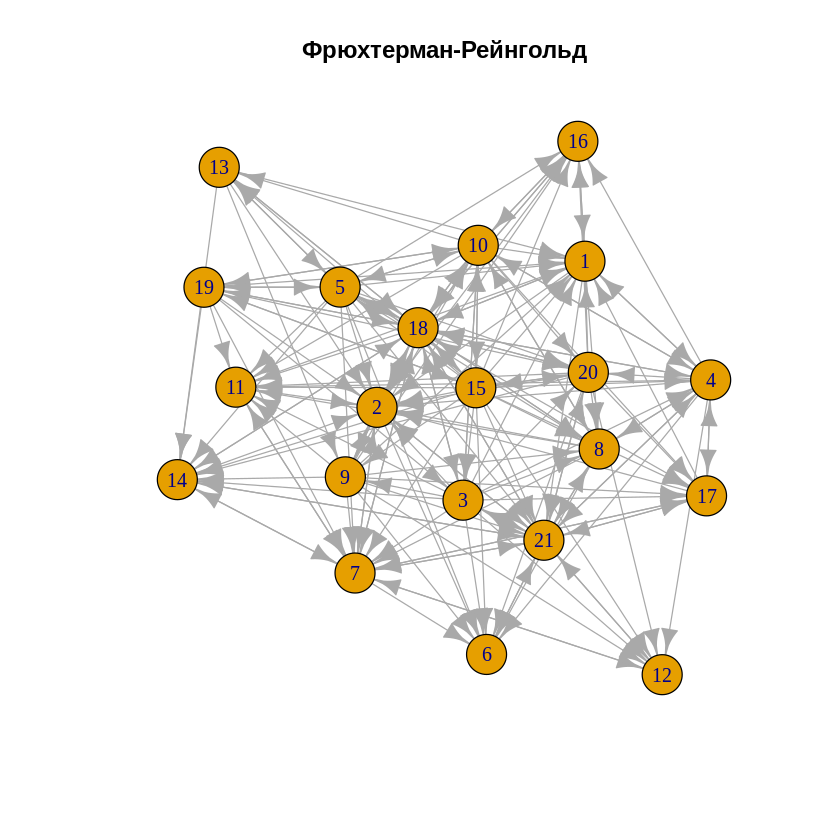

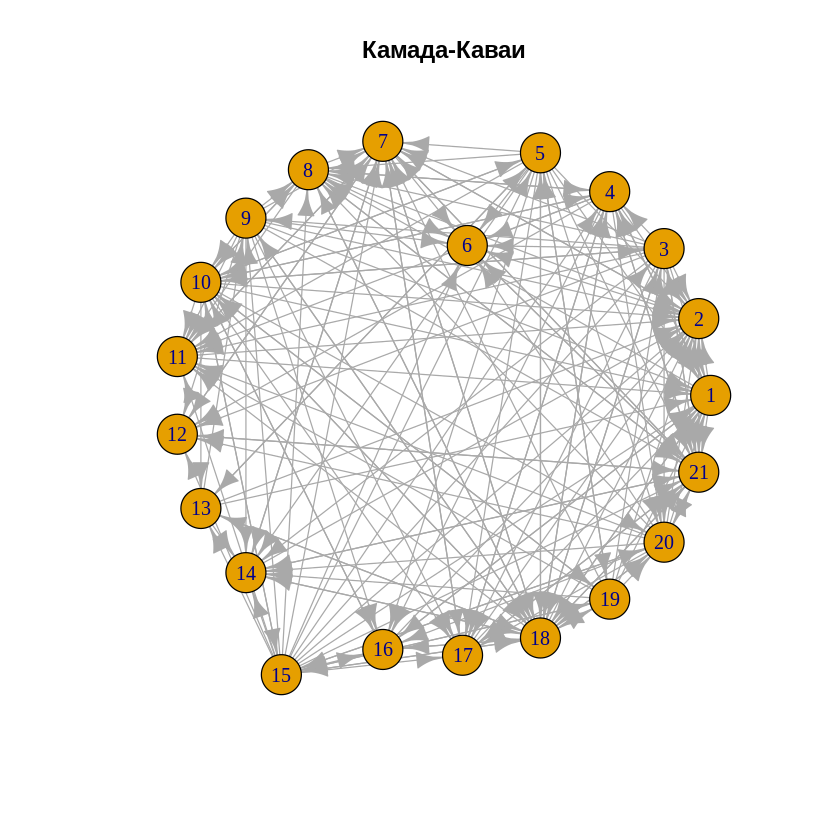

In [ ]:
# Алгоритм Фрюхтермана-Рейнгольда
plot(inet2, main = "Фрюхтерман-Рейнгольд", layout = layout_with_fr)

# Алгоритм Камада-Каваи
plot(inet2, main = "Камада-Каваи", layout = layout_with_kk)

#### 6. Вывод «описательной сводки» сети

In [ ]:
# Перевод графа igraph в граф statnet
snet2 <- asNetwork(inet2)

# Выводим описательную сводку
summary(snet2)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 190 
   missing edges = 0 
   non-missing edges = 190 
 density = 0.452381 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

Network edgelist matrix:
       [,1] [,2]
  [1,]    1    2
  [2,]    1    4
  [3,]    1    8
  [4,]    1   16
  [5,]    1   18
  [6,]    1   21
  [7,]    2    6
  [8,]    2    7
  [9,]    2   21
 [10,]    3    1
 [11,]    3    2
 [12,]    3    4
 [13,]    3    6
 [14,]    3    7
 [15,]    3    8
 [16,]    3    9
 [17,]    3   10
 [18,]    3   11
 [19,]    3   12
 [20,]    3   14
 [21,]    3   17
 [22,]    3   18
 [23,]    3   20
 [24,]    3   21
 [25,]    4    1
 [26,]    4    2
 [27,]    4    6
 [28,]    4    8
 [29,]    4   10
 [30,]    4   11
 [31,]    4   12
 [32,]    4   16
 [33,]    4   17
 [34,]    4   18
 [35,]    4   20
 [36,]    4   21
 [37,]    5    1
 

#### 7. Вычисление «пятичисловой сводки» сети

In [ ]:
# (a) Вычислить размер сети
cat("(a) Размер сети:\n")
cat("Количество вершин:", network.size(snet2), "\n\n")

# (b) Вычислить плотность сети
cat("(b) Плотность сети:\n")
# Вручную: L / (n*(n-1)) для ориентированного графа
n <- network.size(snet2)
density_manual <- (network.edgecount(snet2)) / (n * (n - 1))
cat("Плотность вручную:", round(density_manual, 3), "\n")
cat("Плотность функцией:", round(gden(snet2), 3), "\n\n")

# (c) Число компонент сети
cat("(c) Число компонент:\n")
cat("Число компонент визуально:", 1, "\n")
# Подтверждаем функцией
components <- components(snet2)
cat("Число компонент функцией:", components, "\n\n")

# (d) Диаметр сети в statnet
cat("(d) Диаметр сети:\n")
lgc <- component.largest(snet2, result = "graph")
gd <- geodist(lgc)
net_diameter <- max(gd$gdist)
cat("Максимальное расстояние между вершинами:", net_diameter, "\n\n")

# (e) Коэффициент кластеризации
cat("(e) Коэффициент кластеризации:\n")
clustering_coef <- gtrans(snet2, mode = "graph")
cat("Коэффициент кластеризации:", round(clustering_coef, 3), "\n")

(a) Размер сети:
Количество вершин: 21 

(b) Плотность сети:
Плотность вручную: 0.452 
Плотность функцией: 0.452 

(c) Число компонент:
Число компонент визуально: 1 
Число компонент функцией: 1 

(d) Диаметр сети:
Максимальное расстояние между вершинами: 3 

(e) Коэффициент кластеризации:
Коэффициент кластеризации: 0.664 


##### Вывод
Сеть состоит из 21 менеджера. Значение в 0.45 говорит о умеренно плотной коммуникации менеджеров. Сеть имеет одну компоненту связанности, т.е. все менеджеры прямо или косвенно связаны. Для такой группы диаметр в 3, достаточно неплохой показатель, что  в купе с достаточно высокой кластеризацией говорит об общедоступности ~слухов, полученных у кулера в офисе~ хороших советов. Также по кластеризации в 0,664 ясно, что если менеджер попросил у двух других совет, то вероятно эти двое ~заранее придумали дурацкий совет, чтобы подшутить надо коллегой~ тоже друг с другом посоветовались.

#### 8. Таблица мер престижа

In [ ]:
# 1. Престиж по степени
g <- network.size(snet2)
P_D <- degree(snet2, cmode = "indegree") / (g - 1)

# 2. Престиж по близости
C_C <- igraph::closeness(inet2, mode = "in", normalized = FALSE)
I_i <- colSums(igraph::distances(inet2, mode = "in") > 0)
P_P <- (I_i^2 / (g - 1)) * C_C

# 3. Престиж по рангу
X <- sociomatrix
lambda_max <- ceiling(max(Re(eigen(X)$values)))
a <- 1 / lambda_max
x <- colSums(X)
n_nodes <- ncol(X)
I_mat <- diag(n_nodes)
X_t <- t(X)
left_side <- (1/a) * I_mat - X_t
P_R <- solve(left_side, x)

# Нормировка престижа по рангу
m <- 0
for (k in 0:(g-1)) {
    if (k == 0) {
        A_k <- 1
    } else {
        A_k <- factorial(g-1) / factorial(g-1-k)
    }
    m <- m + (a^k) * A_k
}

P_R_norm <- P_R / m

# Создаем таблицу престижа
prestige_table <- data.frame(
  Vertex = network.vertex.names(snet2),
  Prestige_Degree = P_D,
  Prestige_Closeness = P_P,
  Prestige_Rank = P_R_norm
)

# Выводим таблицу
cat("Таблица мер престижа для ориентированной сети:\n")
print(prestige_table, row.names = FALSE)

Таблица мер престижа для ориентированной сети:
 Vertex Prestige_Degree Prestige_Closeness Prestige_Rank
      1            0.65          0.6666667   0.009367959
      2            0.90          0.9090909   0.015461295
      3            0.25          0.5555556   0.004696152
      4            0.40          0.6250000   0.007899254
      5            0.25          0.5000000   0.003477436
      6            0.50          0.6666667   0.009458588
      7            0.65          0.7407407   0.011784887
      8            0.50          0.6666667   0.008582446
      9            0.20          0.4878049   0.002868507
     10            0.45          0.5714286   0.006454320
     11            0.55          0.6666667   0.008654434
     12            0.35          0.5882353   0.006195022
     13            0.20          0.4878049   0.003105217
     14            0.50          0.6666667   0.007946200
     15            0.20          0.4878049   0.003426242
     16            0.40          0.571428

Вершина 2 - самая влиятельная по всем показателям. У неё больше всего входящих связей (0.90), она ближе всех к остальным (0.91) и имеет высший ранг (0.015).

Вершины 18 и 21 тоже очень сильные - у них много связей (0.75) и хорошая близость к другим (0.80).

Вершины 1, 6, 7, 8, 11, 14 - средние по показателям. Есть связи, но не самые сильные.

Вершины 3, 5, 9, 13, 15, 19 - самые слабые. Мало входящих связей (0.20-0.25), далеко от других (0.49-0.56) и низкий ранг.

## Выводы

Проведенный анализ двух социальных сетей - флорентийских бизнес-семей и менеджеров высокотехнологичной компании - выявил существенные различия в их структуре и свойствах.

Семьи достаточно закрыты и избирательны на бизнес связи, в том время как общительные менеджеры с охотой раздают друг другу советы.